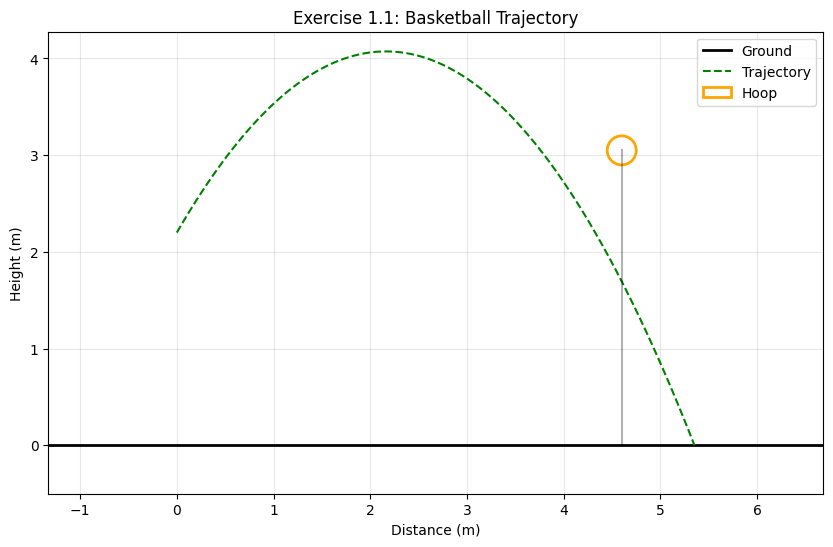

In [4]:
# Q1

import numpy as np
import matplotlib.pyplot as plt

# Parameters
v0 = 7          # Initial velocity (m/s)
theta_deg = 60  # Angle in degrees
h0 = 2.2        # Release height (m)
g = 9.81        # Gravity (m/s^2)
hoop_dist = 4.6 # Distance to hoop (m)
hoop_h = 3.05   # Height of hoop (m)

# Convert angle to radians
theta_rad = np.radians(theta_deg)

# Calculate total flight time to hit the ground (y=0)
# Using quadratic formula for: 0 = h0 + (v0*sin(theta))*t - 0.5*g*t^2
vy = v0 * np.sin(theta_rad)
vx = v0 * np.cos(theta_rad)
t_flight = (vy + np.sqrt(vy**2 + 2 * g * h0)) / g

# Generate time points
t = np.linspace(0, t_flight, num=100)

# Equations of motion
x = vx * t
y = h0 + vy * t - 0.5 * g * t**2

# Plotting
plt.figure(figsize=(10, 6))

# 1. Highlight ground line (y=0)
plt.axhline(0, color='black', linewidth=2, label='Ground')

# 2. Draw trajectory with green dashed line
plt.plot(x, y, 'g--', label='Trajectory')

# 3. Represent the hoop (Circle at 4.6m distance, 3.05m height)
hoop = plt.Circle((hoop_dist, hoop_h), 0.15, color='orange', fill=False, linewidth=2, label='Hoop')
plt.gca().add_patch(hoop)
# Add a pole for the hoop for visualization
plt.plot([hoop_dist, hoop_dist], [0, hoop_h], 'k-', alpha=0.3)

# 4. Labels
plt.title('Exercise 1.1: Basketball Trajectory')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal') # Scale x and y equally to see true angle
plt.ylim(bottom=-0.5)
plt.show()

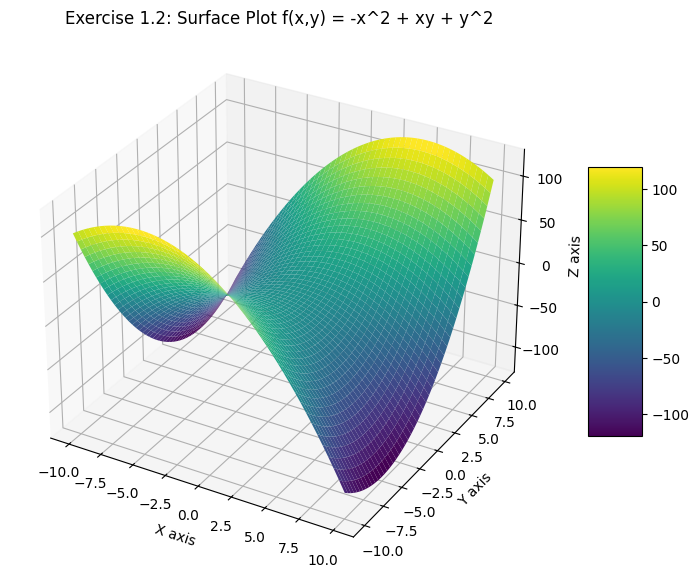

In [3]:
# Q2

from mpl_toolkits.mplot3d import Axes3D

# Data generation
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = -X**2 + X*Y + Y**2

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_title('Exercise 1.2: Surface Plot f(x,y) = -x^2 + xy + y^2')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

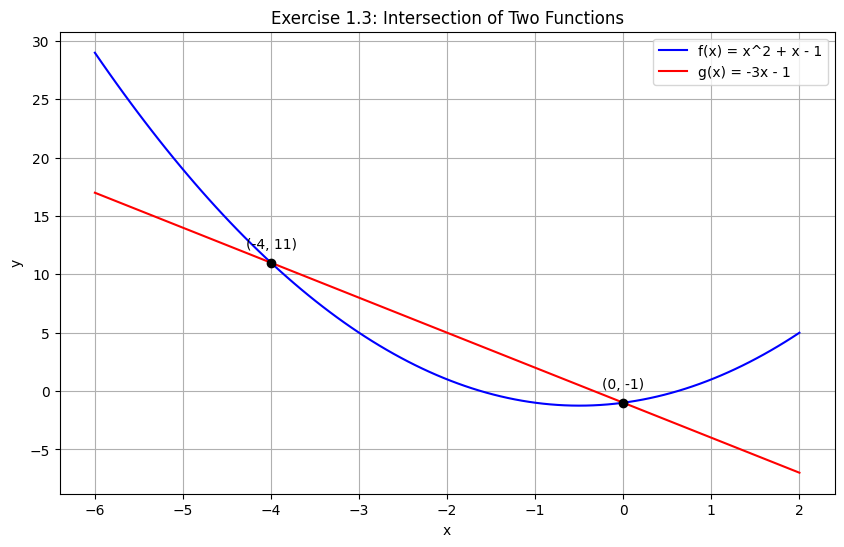

In [5]:
# Q3

# Functions
def f(x): return x**2 + x - 1
def g(x): return -3*x - 1

# Generate x values (range chosen to show intersections at 0 and -4)
x = np.linspace(-6, 2, 100)

plt.figure(figsize=(10, 6))

# Plot lines with different colors
plt.plot(x, f(x), 'b-', label='f(x) = x^2 + x - 1')
plt.plot(x, g(x), 'r-', label='g(x) = -3x - 1')

# Intersection points
intersections_x = [0, -4]
intersections_y = [-1, 11] # calculated by plugging x back into g(x)

# Highlight and label intersections
plt.scatter(intersections_x, intersections_y, color='black', zorder=5)
for ix, iy in zip(intersections_x, intersections_y):
    plt.annotate(f'({ix}, {iy})', (ix, iy), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Exercise 1.3: Intersection of Two Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

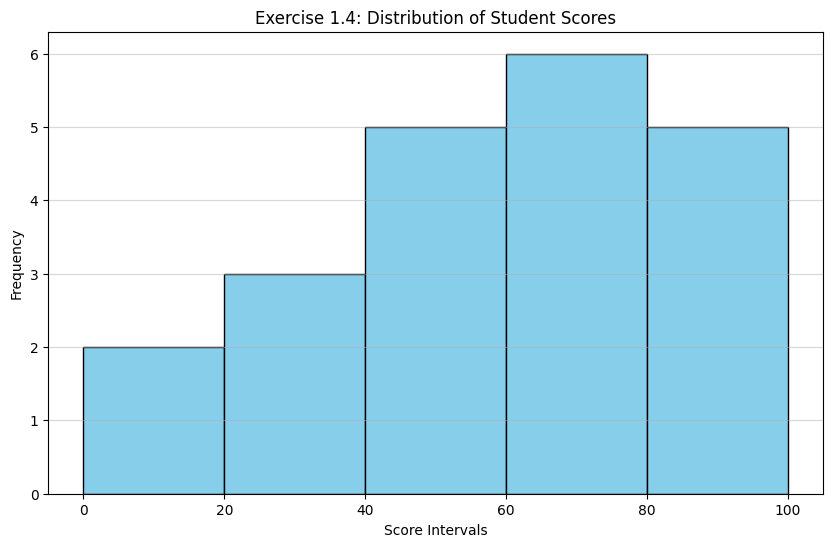

In [6]:
# Q4

# Data from table
scores = [
    76, 10, 21, 61, 40, 65, 40, 95, 77, 92,
    59, 81, 76, 98, 57, 51, 92, 35, 17, 61, 35
]

# Bins: 5 evenly spaced intervals of 20 points (0-20, 20-40, 40-60, 60-80, 80-100)
bins = [0, 20, 40, 60, 80, 100]

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=bins, color='skyblue', edgecolor='black')

plt.title('Exercise 1.4: Distribution of Student Scores')
plt.xlabel('Score Intervals')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.grid(axis='y', alpha=0.5)

plt.show()

/tmp/ipython-input-3119333070.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('file_example_WAV_1MG.wav')


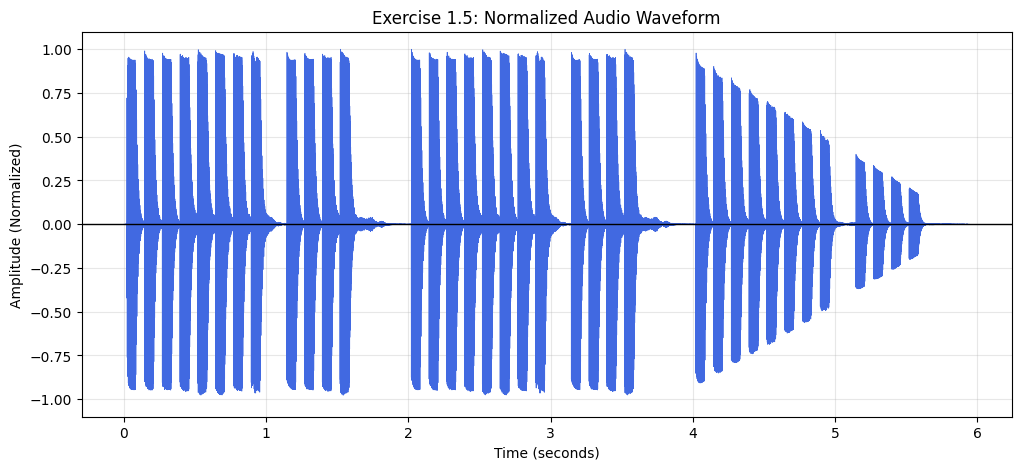

In [9]:
# Q5

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# 1. Read the uploaded file
# Note: 'file_example_WAV_1MG.wav' is the file name
samplerate, data = wavfile.read('file_example_WAV_1MG.wav')

# 2. Handle Stereo vs Mono
# If the audio has 2 channels (stereo), we average them to get a single mono waveform for the graph.
if len(data.shape) > 1:
    data = data.mean(axis=1)

# 3. Normalize to [-1; 1]
# We find the peak value and divide all data points by it.
max_val = np.max(np.abs(data))
if max_val > 0:
    normalized_data = data / max_val
else:
    normalized_data = data # Avoid division by zero for silent audio

# 4. Create Time Axis
# Time = Number of Samples / Sample Rate
duration = len(data) / samplerate
time = np.linspace(0, duration, len(data))

# 5. Plot the Graph
plt.figure(figsize=(12, 5))
plt.plot(time, normalized_data, color='royalblue', linewidth=0.5)

# Formatting
plt.title('Exercise 1.5: Normalized Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (Normalized)')
plt.ylim([-1.1, 1.1])  # Set limits slightly wider to show the peaks touching -1 and 1
plt.grid(True, alpha=0.3)
plt.axhline(0, color='black', linewidth=1) # Draw center line

plt.show()